In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore

In [66]:
df=pd.read_csv("E:\\titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


loaded the titanic dataset.

In [67]:
df.shape

(891, 12)

This dataset has 12 coloumns and 819 rows

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The maximum value age feature  is 80 years.the maximum fare is  512.329200 it is in float value

In [69]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

*age,fare are float type.
*survived,Sibsp,pclass and parch,are ordinal data
*name,sex,ticket,cabin,embarked are object type

###Handling missing values

Training a model with a data set that has a lot of missing values can drastically impact the quality of machine learning model so i'm finding null values in the dataset

In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The feature age has 177 null values,the feature cabin has 687 null values and embarked feature has 2 null values

In [72]:
(891-687)/100

2.04

cabin feature has only 2% of data So I'm removing that feature

In [73]:
data_mod=df.drop('Cabin',axis=1)

Dropping cabin feature

In [74]:
data_mod.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

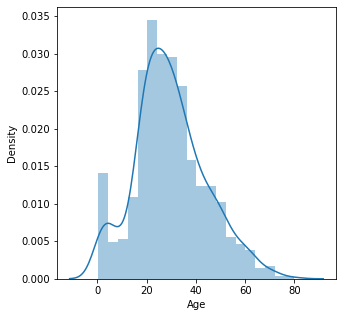

In [75]:
plt.figure(figsize=(5,5))
sns.distplot(df.Age)

To choose the method to fill null values I'm finding distribution of age feature.from the above representation its evident that it almost have normal distribution

In [76]:
data_mod.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [77]:
data_mod['Age'].fillna((data_mod['Age'].mean()), inplace=True)

___Age feature almost form normal curve so I'm using mean value to fill the null values

In [78]:
data_mod.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [79]:
data_mod['Embarked']=data_mod['Embarked'].fillna(data_mod['Embarked'].mode().iloc[0])

___embarked feature is a categorical data so I'm using mode to fill the null values

In [80]:
data_mod['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [81]:
data_mod.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##Univariate Analysis

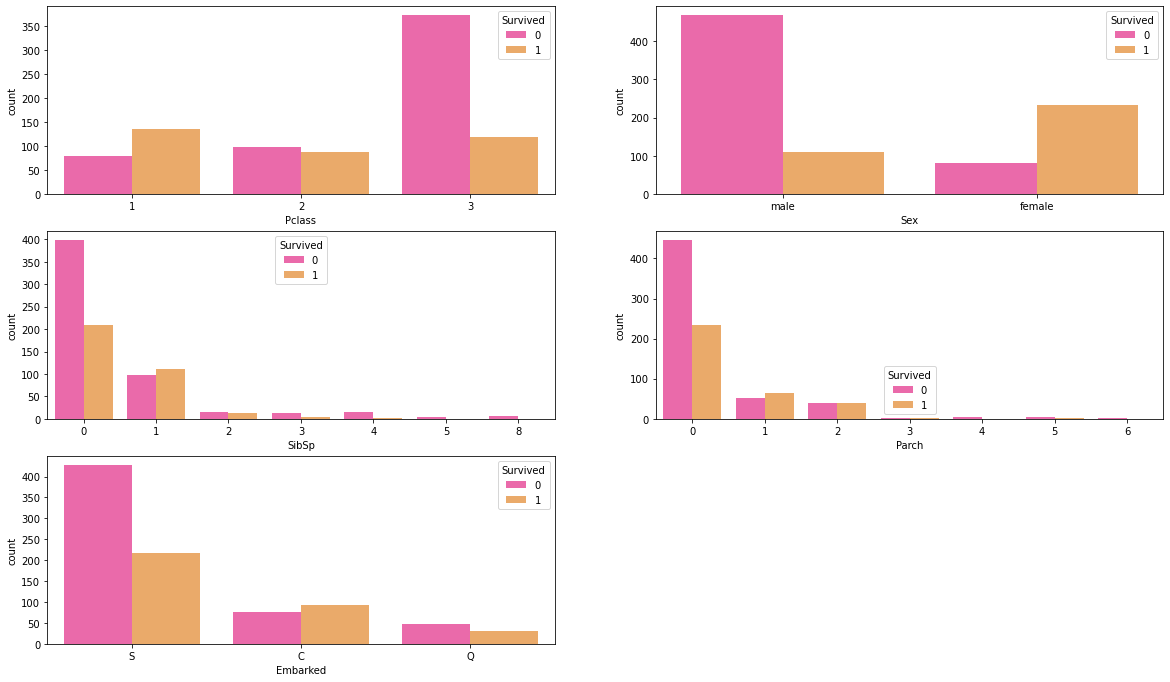

In [82]:
data=['Pclass','Sex','SibSp','Parch','Embarked']
ncol=2
nrows=5
plt.figure(figsize=(20,20))
for i in range(0,5):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=df,palette="spring",hue=df['Survived'])

Here I'm plotting count plot for all categorical feature in the data set.majority of people who belongs to class c in pclass are not surrvived.

more female are surrvived than male

majority of people who embarked in s are not surrvived.

<AxesSubplot:xlabel='Age', ylabel='Density'>

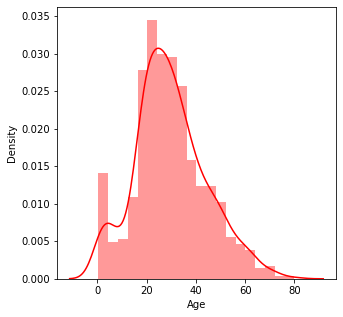

In [83]:
plt.figure(figsize=(5,5))
sns.distplot(df['Age'],color='red',kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

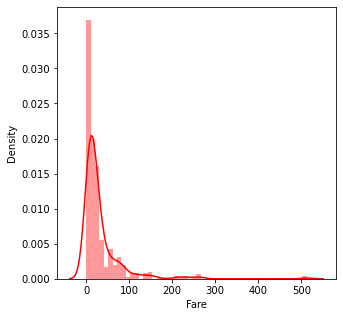

In [84]:
plt.figure(figsize=(5,5))
sns.distplot(df['Fare'],color='red',kde=True)

##Bivariate Analysis

<AxesSubplot:xlabel='Embarked', ylabel='count'>

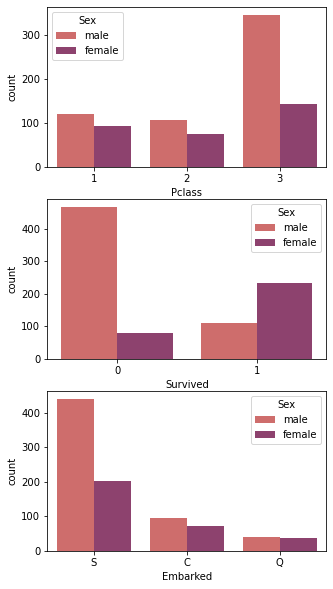

In [85]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.countplot(x=df['Pclass'],data=df,palette="flare",hue=df['Sex'])

i += 1
plt.subplot(rows, cols, i)
sns.countplot(x=df['Survived'],data=df,palette="flare",hue=df['Sex'])
i += 1
plt.subplot(rows, cols, i)
sns.countplot(x=df['Embarked'],data=df,palette="flare",hue=df['Sex'])



Most of the males who majorityly in pclass-3 are not survived

___survived vs Fare

In [86]:

sort_fare=df[["Fare","Survived"]].groupby(["Fare"],as_index = False).mean().sort_values(by = "Survived",ascending = False)
sort_fare

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


##multivariate

<AxesSubplot:>

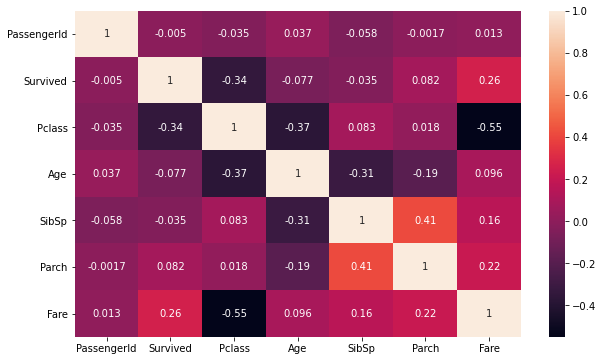

In [87]:
correlation=df.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

__Handling outliers

<AxesSubplot:xlabel='Fare'>

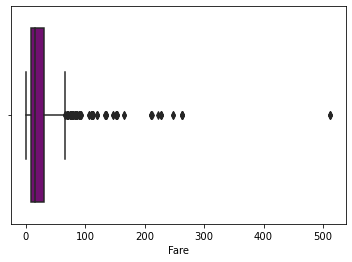

In [88]:
sns.boxplot(df['Fare'],color='purple')

<AxesSubplot:xlabel='Age'>

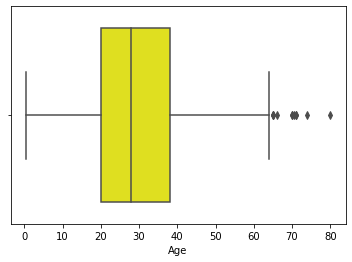

In [89]:
sns.boxplot(df['Age'],color=(1,1,0))

The features age and Fare has outliers

In [90]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [91]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [92]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [93]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [94]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [95]:
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In this dataset the features parch,sibsp,Pclass,Survived are ordinal data.The outliers in the ordinal data won't create any impact on target

Name,sex,Ticket,Embarked are categorical data.The Features age and fare has outliers

removing outliers in age and fare feature

In [96]:
z = np.abs(zscore(df['Age']))
print(np.where(z > 3))

(array([], dtype=int64),)


In [97]:
z = np.abs(zscore(df['Fare']))
print(np.where(z > 3))

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
       689, 700, 716, 730, 737, 742, 779], dtype=int64),)


In [98]:
upper_limit = df['Fare'].mean() + 3*df['Fare'].std()
lower_limit = df['Fare'].mean() - 3*df['Fare'].std()

In [99]:
data=data_mod

In [100]:
data['Fare'] = np.where(
    df['Fare']>upper_limit,
    upper_limit,
    np.where(
        df['Fare']<lower_limit,
        lower_limit,
        df['Fare']
    )
)

<AxesSubplot:xlabel='Fare'>

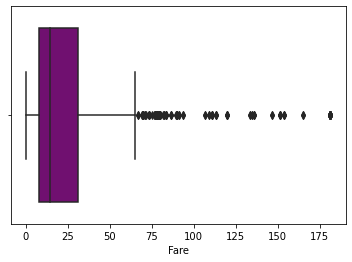

In [101]:
sns.boxplot(data_mod['Fare'],color='purple')

__DETECTING and REMOVING SKEWNESS

<AxesSubplot:xlabel='Fare', ylabel='Density'>

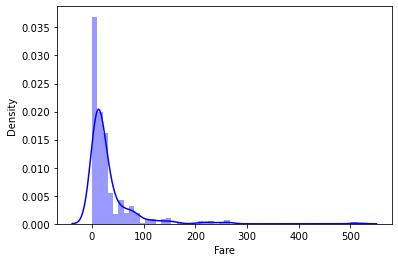

In [102]:
sns.distplot(df['Fare'],color='blue',kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

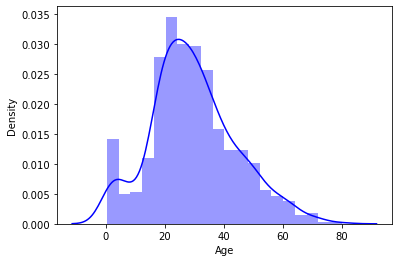

In [103]:
sns.distplot(df['Age'],color='blue',kde=True)

In [104]:
F= (data_mod['Fare']).skew()
print(F)

2.4654360651077605


In [105]:
A= (data_mod['Age']).skew()
print(A)

0.4344880940129925


There is no skewness in age but feature Fare having skewness

In [106]:
data_clean=data

In [107]:
data_clean['Fare']=np.log1p(data_clean['Fare'])

In [108]:
f= (data_clean['Fare']).skew()
print(f)

0.25200259840043504


<AxesSubplot:xlabel='Fare'>

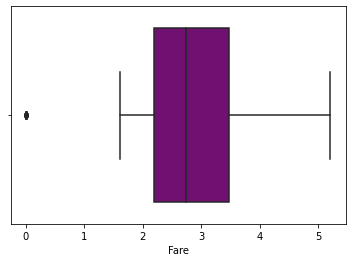

In [109]:
sns.boxplot(data_clean['Fare'],color='purple')

The outliers are removed

In [110]:
data_clean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


__converting categorical columns sex and embarked to numerical coloumn by label encoder

In [111]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
data_clean['Sex']= label.fit_transform(data_clean['Sex']) 
print(data_clean['Sex'].unique())

[1 0]


In [112]:
data_clean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,S


In [113]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
data_clean['Embarked']= label.fit_transform(data_clean['Embarked']) 
print(data_clean['Embarked'].unique())

[2 0 1]


In [114]:
data_clean.shape

(891, 11)

__checking for class imbalance in target column

The Class Imbalance Problem is a common problem affecting machine learning due to having disproportionate number of class instances in practice.

<AxesSubplot:xlabel='Survived', ylabel='count'>

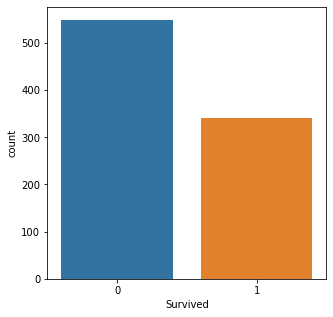

In [115]:
plt.figure(figsize=(5,5))
sns.countplot(data_clean.Survived)

 There is no class imbalance

In [116]:
y1=df['Survived']

In [117]:
data_clean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,2


In [118]:
drop_column = ['Ticket','Name']

In [119]:
data_clean=data_clean.drop(drop_column,axis=1)

In [120]:
data_clean


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,2.110213,2
1,2,1,1,0,38.000000,1,0,4.280593,0
2,3,1,3,0,26.000000,0,0,2.188856,2
3,4,1,1,0,35.000000,1,0,3.990834,2
4,5,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,2.639057,2
887,888,1,1,0,19.000000,0,0,3.433987,2
888,889,0,3,0,29.699118,1,2,3.196630,2
889,890,1,1,1,26.000000,0,0,3.433987,0


Modelling

The steps done below are

*splitting test and train data 

*modelling and comparing accuracy,average accuracy of recall,precision and fscore for 4 classifer models

*plotting ROC &AUC curve for each model

* To predict the performance of a model on unavailable data I have used cross validation

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
x=data_clean
y=y1

In [122]:
x_train ,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [123]:

rfc = RandomForestClassifier(n_estimators = 100,max_depth=5, random_state=7)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

1.0

In [124]:
y_pred_1 = rfc.predict(x_test)

In [125]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[161   0]
 [  0 107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       107

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Accuracy: 1.0


No Skill: ROC AUC=0.500
Random forest: ROC AUC=1.000


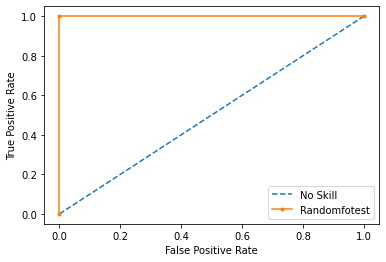

In [252]:
ns_probs = [0 for _ in range(len(y_test))]
m_probs = y_pred_1
# keep probabilities for the positive outcome only
##lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
m_auc = roc_auc_score(y_test, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random forest: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
m_fpr, m_tpr,_=roc_curve(y_test, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Randomfotest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

___KNeighborsClassifier

In [197]:

knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.5597014925373134

In [198]:
y_pred_1 = knn.predict(x_test)

In [199]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[128  38]
 [ 80  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.68       166
           1       0.37      0.22      0.27       102

    accuracy                           0.56       268
   macro avg       0.49      0.49      0.48       268
weighted avg       0.52      0.56      0.53       268

Accuracy: 0.5597014925373134


No Skill: ROC AUC=0.500
model: ROC AUC=0.493


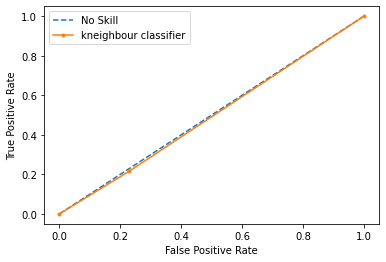

In [201]:
ns_probs = [0 for _ in range(len(y_test))]
m_probs = y_pred_1
# keep probabilities for the positive outcome only
##lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
m_auc = roc_auc_score(y_test, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
m_fpr, m_tpr,_=roc_curve(y_test, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='kneighbour classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

___BaggingClassifier

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.3)
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=7),n_estimators=100,
                          bootstrap=True,oob_score=True,random_state=1)
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test,y_test)

0.5559701492537313

In [203]:
y_pred_1 = bag_knn.predict(x_test)

In [204]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[125  38]
 [ 81  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       163
           1       0.39      0.23      0.29       105

    accuracy                           0.56       268
   macro avg       0.50      0.50      0.48       268
weighted avg       0.52      0.56      0.52       268

Accuracy: 0.5559701492537313


No Skill: ROC AUC=0.500
model: ROC AUC=0.498


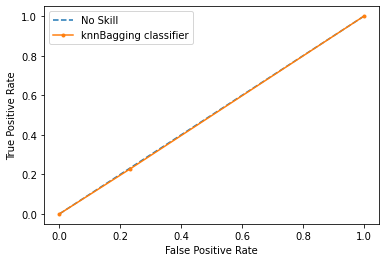

In [205]:
ns_probs = [0 for _ in range(len(y_test))]
m_probs = y_pred_1
# keep probabilities for the positive outcome only
##lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
m_auc = roc_auc_score(y_test, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
m_fpr, m_tpr,_=roc_curve(y_test, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='knnBagging')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

___Support vector classifer

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.33)
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6305084745762712

In [229]:
y_pred_1 = svc.predict(x_test)

In [230]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[186   0]
 [109   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       186
           1       0.00      0.00      0.00       109

    accuracy                           0.63       295
   macro avg       0.32      0.50      0.39       295
weighted avg       0.40      0.63      0.49       295

Accuracy: 0.6305084745762712


No Skill: ROC AUC=0.500
model: ROC AUC=0.500


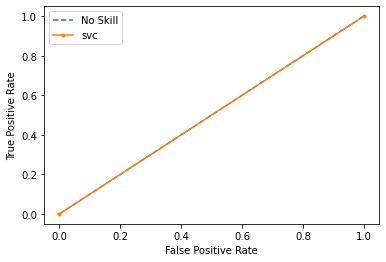

In [231]:
ns_probs = [0 for _ in range(len(y_test))]
m_probs = y_pred_1
ns_auc = roc_auc_score(y_test, ns_probs)
m_auc = roc_auc_score(y_test, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
m_fpr, m_tpr,_=roc_curve(y_test, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='svc')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25)
dt =DecisionTreeClassifier(random_state = 7)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

1.0

In [212]:
y_pred_1 = dt.predict(x_test)

In [213]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[140   0]
 [  0  83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        83

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Accuracy: 1.0


No Skill: ROC AUC=0.500
model: ROC AUC=1.000


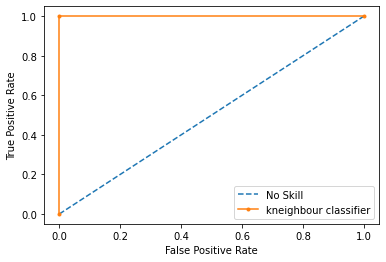

In [214]:
ns_probs = [0 for _ in range(len(y_test))]
m_probs = y_pred_1
# keep probabilities for the positive outcome only
##lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
m_auc = roc_auc_score(y_test, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
m_fpr, m_tpr,_=roc_curve(y_test, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='kneighbour classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [161]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(random_state=7,n_estimators=10)
scores=cross_val_score(rf,x_train,y_train,cv=5)
scores

array([1., 1., 1., 1., 1.])

In [162]:
from sklearn.model_selection import cross_val_score
knr=KNeighborsClassifier()
scores=cross_val_score(knr,x_train,y_train,cv=5)
scores

array([0.552     , 0.504     , 0.536     , 0.59677419, 0.58064516])

In [163]:
from sklearn.model_selection import cross_val_score
bag=BaggingClassifier(KNeighborsClassifier(n_neighbors=7),random_state=7,)
scores=cross_val_score(bag,x_train,y_train,cv=5)
scores

array([0.552     , 0.536     , 0.584     , 0.62903226, 0.60483871])

__To Avoid overfitting,bias I have found the difference between accuarcy of predicted modelfor known data and accuracy of predicted model for unknown data(cross validation score)

Difference of knn classifier (0.515695067264574-0.53225806)*100 is ___1.656299274

Difference of Bagging classifier is (0.6681614349775785-0.56451613)*100 is ___10.3645305

Difference of svc ( 0.6542372881355932-0.60483871)*100 is ___4.939857814

Difference of random forest classifier is ___0

random forest classifier has zero difference so I selected random forest classifier as best model

___Hyper tuning

In [232]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
x=data_clean
y=df['Survived']
model = RandomForestClassifier()
grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[True],
                "n_estimators":[100,300],
                "criterion":["gini"]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 1.000000 using {'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


In [ ]:
__modelling after hyper tuning

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25)
model =RandomForestClassifier(criterion='gini',max_features=1,min_samples_leaf=1,min_samples_split=3,n_estimators=300)
model.fit(x_train,y_train)
model.score(x_test,y_test) 

1.0

In [129]:
y_pred_1 = model.predict(x_test)

In [130]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[147   0]
 [  0  76]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        76

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Accuracy: 1.0


No Skill: ROC AUC=0.500
Randomforest: ROC AUC=1.000


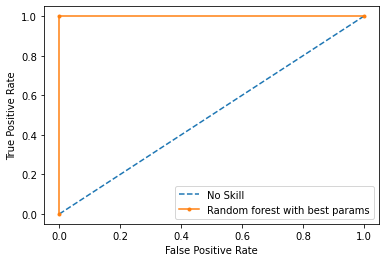

In [240]:
ns_probs = [0 for _ in range(len(y_test))]
m_probs = y_pred_1
ns_auc = roc_auc_score(y_test, ns_probs)
m_auc = roc_auc_score(y_test, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Randomforest: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(y_test, ns_probs)
m_fpr, m_tpr,_=roc_curve(y_test, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Random forest with best params')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

__save the model

In [131]:
from joblib import dump
dump(model, 'model_titanic.joblib')

['model_titanic.joblib']

In [132]:
from joblib import load
loaded = load('model_titanic.joblib')